In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
SF_data = pd.read_excel('SF_meetbot.xlsx')
directory_data_SF = pd.read_csv('../data/San Francisco/directory_data.csv')
directory_data_PA = pd.read_csv('../data/Palo Alto/directory_data.csv')

directory_data = pd.concat([directory_data_PA, directory_data_SF])


In [3]:
SF_data.head()

,Employee #,"Last name, First name",Employment Status,Employment Status: Date,Division,Department,Physical Location
0,2047,"Adams, Matthew",Full time,2000-05-08,Palo Alto,General,Palo Alto
1,3895,"Adranly, Rochael",Full time,2015-01-01,Global,Legal,San Francisco
2,6432,"Ahmadian , Alisa",Full time,2016-10-17,SF OpenIDEO,General,San Francisco
3,5182,"Alba, Katherine",Full time,2017-01-01,IDEO U,General,San Francisco
4,3111,"Aleta, Joshua",Full time,2005-11-07,Palo Alto,General,Palo Alto


In [4]:
directory_data.head()

,business_lead_em_id,discipline,em_id,email_address,employee_type,first_name,hired_at,id,is_active,journey_role,last_name,title,visible_in_newtube
0,1629.0,Mechanical Engineering,2091,jfourt@ideo.com,employee,Jesse,2000-06-19,64,True,Senior Portfolio Director,Fourt,Director,True
1,5553.0,Design Research,7106,jwatterson@ideo.com,employee,Jessica,2018-10-15,55,True,Senior Designer,Watterson,Individual,True
2,5276.0,Interaction Design,5400,jstykow@ideo.com,employee,Jetti,2014-03-17,59,True,Senior Design Lead,Stykow,Team,True
3,1528.0,Prototyping,1124,jimf@ideo.com,employee,Jim,1992-05-18,69,True,Principal Designer,Feuhrer,Individual,True
4,1397.0,Mechanical Engineering,1022,jimy@ideo.com,temporary,Jim,2018-07-27,64,True,Senior Design Director,Yurchenco,Director,True


In [5]:
SF_data = SF_data.merge(directory_data, left_on = 'Employee #', right_on = 'em_id')

In [6]:
set(SF_data.title.values)

{'Director', 'Enterprise', 'Individual', 'Team', nan}

In [7]:
SF_data.head()

,Employee #,"Last name, First name",Employment Status,Employment Status: Date,Division,Department,Physical Location,business_lead_em_id,discipline,em_id,email_address,employee_type,first_name,hired_at,id,is_active,journey_role,last_name,title,visible_in_newtube
0,2047,"Adams, Matthew",Full time,2000-05-08,Palo Alto,General,Palo Alto,1397.0,Mechanical Engineering,2047,madams@ideo.com,employee,Matt,2000-05-08,64,True,Senior Portfolio Director,Adams,Director,True
1,3895,"Adranly, Rochael",Full time,2015-01-01,Global,Legal,San Francisco,1832.0,Legal,3895,radranly@ideo.com,employee,Rochael,2015-01-01,60,True,General Counsel and Legal Design Lead,Adranly,Enterprise,True
2,6432,"Ahmadian , Alisa",Full time,2016-10-17,SF OpenIDEO,General,San Francisco,5479.0,Business Development,6432,aahmadian@ideo.com,employee,Alisa,2016-10-17,42,True,Senior Business Development Associate,Ahmadian,Individual,True
3,5182,"Alba, Katherine",Full time,2017-01-01,IDEO U,General,San Francisco,6248.0,Product Owner,5182,kalba@ideo.com,employee,Katie,2013-06-25,84,True,Senior Product Lead,Alba,Team,True
4,3111,"Aleta, Joshua",Full time,2005-11-07,Palo Alto,General,Palo Alto,1528.0,Coordination,3111,jaleta@ideo.com,employee,Joshua,2005-11-07,71,True,Coordinator,Aleta,Individual,True


In [8]:
SF_data = SF_data[SF_data['Employment Status'] == 'Full time']
print(len(SF_data))
SF_data[SF_data['Last name, First name'] == 'Nash, Lisa']

362


,Employee #,"Last name, First name",Employment Status,Employment Status: Date,Division,Department,Physical Location,business_lead_em_id,discipline,em_id,email_address,employee_type,first_name,hired_at,id,is_active,journey_role,last_name,title,visible_in_newtube


In [75]:
with open('../data/San Francisco/project_json.json') as json_data:
    project_lists_SF = json.load(json_data)
    
with open('../data/Palo Alto/project_json.json') as json_data:
    project_lists_PA = json.load(json_data)
    
project_lists = dict(project_lists_SF, **project_lists_PA)

In [76]:
project_lists

{'CDomina@ideo.com': [13743,
  9667,
  294,
  3997,
  2337,
  3158,
  6723,
  11752,
  17337,
  26585,
  11793,
  26096,
  13381,
  24810,
  24308,
  12605,
  10858,
  18131,
  20178,
  17235,
  4420,
  5989,
  16247,
  12786,
  3,
  28248,
  339,
  3774,
  23878,
  25291,
  24199,
  26513,
  1278,
  5210,
  5093,
  5350,
  13760,
  14098,
  2278,
  2328,
  2282,
  2534,
  11909,
  11897,
  517,
  2981,
  3669,
  3775,
  3336,
  5449,
  5575,
  5576,
  26157,
  21414,
  951,
  17429,
  25999,
  1540,
  7476,
  2625,
  14863,
  14568,
  5460,
  14316,
  7970,
  10031,
  17716,
  5045,
  2409,
  17821,
  2615,
  26719,
  6066,
  2660,
  19004,
  24282,
  14897,
  5604,
  1332,
  3487,
  1077,
  11768,
  20778,
  1477,
  1277,
  18594,
  15675,
  7697,
  3340,
  3140,
  23785,
  14064,
  1322,
  5952,
  14758,
  17393,
  3887,
  4007,
  13288,
  14308,
  25249,
  24938,
  2952,
  21353,
  20249,
  16102,
  18268,
  18847,
  17442,
  25070,
  25039,
  1983,
  5891,
  5685,
  20930,
  15051

In [77]:
print('length before ', len(SF_data))
SF_data = SF_data[SF_data['Division'] != 'Play Lab']
print('length after', len(SF_data))

length before  362
length after 347


In [78]:
random_emp = SF_data.sample(frac=1)
random_emp.head()

,Employee #,"Last name, First name",Employment Status,Employment Status: Date,Division,Department,Physical Location,business_lead_em_id,discipline,em_id,email_address,employee_type,first_name,hired_at,id,is_active,journey_role,last_name,title,visible_in_newtube
153,3113,"Hendrickson, Christine",Full time,2017-05-29,Global,Marketing,San Francisco,1648.0,Marketing,3113,chendrickson@ideo.com,employee,Christine,2005-05-09,62,True,"Managing Director, Brand Strategy & Operations",Hendrickson,Enterprise,True
59,7239,"Chang, Jessie",Full time,2019-04-29,SF OS,General,San Francisco,6359.0,Talent,7239,jchan@ideo.com,employee,Jessie,2019-04-22,56,True,Senior Talent Lead,Chan,Team,True
15,7021,"Azimi, Khaled",Full time,2018-07-30,Regional Bay Area,General,Palo Alto,6522.0,Talent,7021,kazimi@ideo.com,employee,Khaled,2018-07-30,56,True,Talent Specialist,Azimi,Individual,True
329,6580,"Romanova, Kateryna",Full time,2019-02-11,SF D4C,General,San Francisco,4710.0,Environments Design,6580,kromanova@ideo.com,employee,Kateryna,2019-02-11,50,True,Senior Designer,Romanova,Individual,True
238,6727,"Lukasik, Adam",Full time,2018-01-02,CoLab,General,San Francisco,4035.0,Interaction Design,6727,alukasik@ideo.com,employee,Adam,2018-01-02,59,True,Senior Designer,Lukasik,Individual,True


In [79]:
random_emp_num = random_emp['Employee #'].values

In [80]:
print(len(random_emp_num)//3 * 3)
random_emp_num_short = random_emp_num[:len(random_emp_num)//3 * 3]

print(random_emp_num_short)

345
[3113 7239 7021 6580 6727 5760 4611 6821 3980 6382 5370 5158 4035 3152
 6661 6683 6807 7133 6526 2972 1124 6746 7045 5129 4962 6496 1984 4991
 4402 6818 6022 5318 6596 7110 1397 5402 3274 6031 6757 5400 6577 3966
 5598 6071 6108 6432 2053 4978 5292 7172 2446 6677 3171 6730 6441 7106
 4710 3238 5997 6551 4850 5419 5327 5726 6184 1240 7162 5772 7099 6534
 7060 6360 6053 7205 6771 7134 4376 5559 6486 6864 6714 4982 6498 7116
 5794 5510 5186 4626 1295 6074 5056 1981 6763 6275 7254 1602 3292 6442
 3797 3895 6443 1629 4922 6655 7231 6904 6195 6412 7236 3791 6461 6728
 6850 6575 6138 5535 6622 4688 5197 7093 1054 5396 6507 3030 7087 5511
 5217 6470 7154 5597 7067 6299 5101 6456 6553 5154 7086 7129 4739 6514
 5688 7050 3713 6167 7253 6423 5276 6263 6088 3111 2989 6190 1717 1164
 7076 6845 6431 7160 5436 7071 5553 6844 1045 6808 7175 5947 3370 1718
 5940 5222 5122 4541 6366 7115 6046 1027 3045 2980 6814 6522 7016 6657
 3361 7136 5965 7094 6245 7155 6474 2760 3120 6076 5390 6359 7072 5178
 6

In [81]:
import numpy as np
groups = np.array(np.split(random_emp_num_short, 3)).T

In [82]:
from simanneal import Annealer
import random

In [83]:
def recode_project_dict(project_lists, dir_data):
    new_dict = dict()
    for name in project_lists.keys():
        try:
            emp_id = dir_data[dir_data['email_address'] == name]['em_id'].values[0]
            new_dict[emp_id] = project_lists[name]
        except IndexError:
            pass
    return new_dict

In [84]:
DIRECTORY_DATA = SF_data
def title_score(group):
    title_dict = {'Individual':0,
                  'nan':0,
                  'Team':1,
                  'Director':2,
                  'Enterprise':2
                }
    titles = []
    for member in group:
        member_titles = DIRECTORY_DATA[DIRECTORY_DATA['em_id'] == member]['title'].values[0]
        titles.append(member_titles)

    title_nums = np.array([title_dict[str(title)] for title in titles])
    if (len(title_nums[title_nums==2])>1) | (len(title_nums[title_nums==0]) > 2):
        score = 10
    else:
        score = 3-(len(set(title_nums)))
    
    title_spread = (max(title_nums) - min(title_nums))
    
    score += (2- title_spread)
   
    
    
    return score/12
        

In [85]:
def division_score(group):
    divisions = []
    for member in group:
        member_divisions = DIRECTORY_DATA[DIRECTORY_DATA['em_id'] == member]['Division'].values[0]
        divisions.append(member_divisions)
    divisions = np.array(divisions)

    condition = ((divisions=='Palo Alto') | (divisions == 'Play Lab'))
    if len(divisions[condition])>1:
        score = 4
    else:
        score = 3-(len(set(divisions)))
    

    return score/4

In [86]:
# division_score(itinerary[9])
new_project_list = recode_project_dict(project_lists, SF_data)

In [87]:
PROJECTS = new_project_list
def shared_projects(group):
    all_member_projects = []
    for member in group:
        member_projects = PROJECTS[member]
        all_member_projects += member_projects
    group_projects = pd.Series(all_member_projects)
    group_projects = group_projects.value_counts() - 1
    num_overlap = group_projects.sum()
    
    if num_overlap > 9:
        score = 10
    else:
        score = 0
    return score/10.

In [88]:
def bl_in_group(group, directory_data):
    bl_ids = []
    for member in group:
        bl_id = directory_data[directory_data['em_id'] == member]['business_lead_em_id'].values[0]
        if str(bl_id) != 'nan':
            bl_ids.append(int(bl_id))
        else:
            bl_ids.append(0)
    
    group = set(group)
    bl_ids = set(bl_ids)
    bl_overlap = len(group.intersection(bl_ids))
    
    if bl_overlap > 0:
        bl_overlap = 1
    
    return bl_overlap
    

In [89]:
#bl_in_group(itinerary[90], SF_data)

In [90]:
def discipline_variety(group, directory_data):
    divisions = []
    for member in group:
        member_divisions = DIRECTORY_DATA[DIRECTORY_DATA['em_id'] == member]['Division'].values[0]
        divisions.append(member_divisions)
    divisions = np.array(divisions)

    condition = ((divisions=='Palo Alto') | (divisions == 'Play Lab'))
    if len(divisions[condition])>1:
        score = 10
    else:
        score = (3-(len(set(divisions))))/3

In [91]:
import numpy as np

class SFGroup(Annealer):
    """Test annealer with a SF groups."""
    def __init__(self, groups, project_lists, directory_data):
        self.state = groups
        self.projects = project_lists
        self.directory_data = directory_data
        
        self.scores = np.zeros(len(groups))
        self.sub_scores = np.zeros([len(groups), 4])
        
        
    def move(self):
        """Swaps two people in groups."""
    
        group1 = random.randint(0, len(groups)-1) #np.where(self.scores == max(self.scores))[0][0]#random.randint(0, len(groups)-1)
        group2 = random.randint(0, len(groups)-1)
        
        a = random.randint(0,2)
        b = random.randint(0,2)
        new_state = self.state.copy()
        
        new_state[group1, a] = self.state[group2, b]
        new_state[group2, b] = self.state[group1, a]
        self.state = new_state
        
    def energy(self):
        """Calculates the energy as the number of shared projects."""
        e = 0
        
        scores = []
        title_scores = []
        sub_scores = []
        for group in self.state:
            title_s = title_score(group)
            shared = shared_projects(group)
            division = division_score(group)
            bl_overlap = bl_in_group(group, self.directory_data)
            
            group_score = (4*shared + 4*title_s + 5*division + 10*bl_overlap)/14
            sub_scores.append([title_s, shared, division, bl_overlap, group_score])
            
            
            e += group_score
            scores.append(group_score)
        self.scores = np.array(scores)
        self.sub_scores = np.array(sub_scores)

        return e
    
    
        


In [100]:
new_groups = SFGroup(groups, new_project_list, SF_data)
new_groups.move()
new_groups.energy()
new_groups.sub_scores # title, shared projects, division, bl_overlap

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.16666667, 0.        , 0.        , 0.        , 0.04761905],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.16666667, 0.        , 0.        , 0.        , 0.04761905],
       [0.16666667, 0.        , 0.25      , 0.        , 0.13690476],
       [0.16666667, 0.        , 0.        , 0.        , 0.04761905],
       [0.16666667, 0.        , 1.        , 0.        , 0.4047619 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.16666667, 1.        , 0.25      , 0.        , 0.42261905],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.08333333, 0.        , 0.        , 0.        , 0.02380952],
       [0.83333333, 0.        , 0.        , 0.        , 0.23809524],
       [0.83333333, 0.        , 0.        , 0.        , 0.23809524],
       [1.        , 1.        , 0.        , 0.        , 0.57142857],
       [0.        , 1.        , 0.

(array([55., 12., 18., 10.,  7.,  3.,  7.,  0.,  0.,  3.]),
 array([0.        , 0.0952381 , 0.19047619, 0.28571429, 0.38095238,
        0.47619048, 0.57142857, 0.66666667, 0.76190476, 0.85714286,
        0.95238095]),
 <a list of 10 Patch objects>)

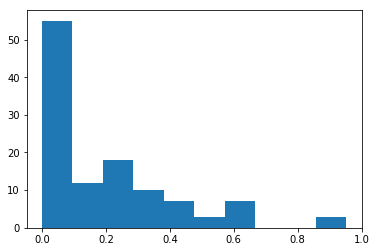

In [101]:
start_scores = new_groups.scores
plt.hist(start_scores)


In [102]:
new_groups.steps = 15000
new_groups.Tmax = 50.0
new_groups.Tmin = 0.01

In [103]:

itinerary, miles = new_groups.anneal()

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.01000          1.40    25.33%     2.00%     2:55:30     0:00:00

In [98]:
new_groups.sub_scores

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.16666667, 0.        , 0.        , 0.        , 0.04761905],
       [0.16666667, 0.        , 0.        , 0.        , 0.04761905],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.08333333, 0.        , 0.        , 0.        , 0.02380952],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 1.        , 0.        , 0.64285714],
       [0.08333333, 0.        , 0.        , 0.        , 0.02380952],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.16666667, 0.        , 0.        , 0.        , 0.04761905],
       [0.16666667, 0.        , 0.        , 0.        , 0.04761905],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.08333333, 0.        , 0.

In [104]:
count = 0 
for group in itinerary:
    print('count ', count)
    print('score ', new_groups.scores[count])
    print('subscores ', new_groups.sub_scores[count]) #title, shared projects, division, bl_overlap
    print(SF_data[SF_data.em_id.isin(group)][['Last name, First name','Division','discipline', 'title', 'email_address']])
    print(' ')
    print(' ')
    count += 1


count  0
score  0.0
subscores  [0. 0. 0. 0. 0.]
       Last name, First name     Division           discipline       title  \
45            Brown, Timothy       Global    Industrial Design  Enterprise   
149          Harding, Joshua      SF Food  Comm Design - Media  Individual   
271  Nakazato Andrade, Pedro  SF Hatchery   Interaction Design        Team   

         email_address  
45     tbrown@ideo.com  
149  jharding@ideo.com  
271  pandrade@ideo.com  
 
 
count  1
score  0.0
subscores  [0. 0. 0. 0. 0.]
    Last name, First name     Division              discipline       title  \
188      Kaplan, Jonathan    Palo Alto  Mechanical Engineering    Director   
400        Visco, Matthew  SF Hatchery      Interaction Design  Individual   
427        Yuan, Michelle       Global              Accounting        Team   

        email_address  
188  jkaplan@ideo.com  
400   mvisco@ideo.com  
427    myuan@ideo.com  
 
 
count  2
score  0.0
subscores  [0. 0. 0. 0. 0.]
    Last name, First name 

count  35
score  0.0
subscores  [0. 0. 0. 0. 0.]
    Last name, First name   Division            discipline       title  \
1        Adranly, Rochael     Global                 Legal  Enterprise   
89     Diamond, Stephanie    SF Food          Food Science  Individual   
343     Schreiber, Lauren  Palo Alto  Business Development        Team   

           email_address  
1      radranly@ideo.com  
89     sdiamond@ideo.com  
343  lschreiber@ideo.com  
 
 
count  36
score  0.0
subscores  [0. 0. 0. 0. 0.]
    Last name, First name Division      discipline       title  \
156          Hewens, Sean   SF D4C  Systems Design    Director   
252    Martinez, Virginia    SF OS          Talent        Team   
383      Terrill, Zachary   IDEO U      Operations  Individual   

                email_address  
156          shewens@ideo.com  
252  vmartinezmartin@ideo.com  
383         zterrill@ideo.com  
 
 
count  37
score  0.0
subscores  [0. 0. 0. 0. 0.]
    Last name, First name   Division           

    Last name, First name   Division             discipline       title  \
54        Carter, Nathan      SF D4C  Comm Design - Graphic        Team   
134       Grishaver, Alex  Palo Alto     Interaction Design    Director   
144     Hajizadeh, Alvand     SF D4L   Business Development  Individual   

           email_address  
54      ncarter@ideo.com  
134  agrishaver@ideo.com  
144  ahajizadeh@ideo.com  
 
 
count  73
score  0.0
subscores  [0. 0. 0. 0. 0.]
         Last name, First name     Division              discipline  \
191              Kelley, David       Global  Electrical Engineering   
264      Montgomery, Margarita  SF Hatchery         Design Research   
267  Moriarity Sacks, Caroline        SF OS         Design Research   

          title             email_address  
191  Enterprise          dkelley@ideo.com  
264  Individual      mmontgomery@ideo.com  
267        Team  cmoriaritysacks@ideo.com  
 
 
count  74
score  0.047619047619047616
subscores  [0.16666667 0.         0

    Last name, First name     Division           discipline       title  \
50       Canada, Margaret  SF Hatchery         Coordination  Individual   
52       Carroll, Rebecca        CoLab      Business Design        Team   
162        Houston, Jonah    Palo Alto  Organization Design    Director   

         email_address  
50    mcanada@ideo.com  
52   bcarroll@ideo.com  
162  jhouston@ideo.com  
 
 
count  109
score  0.0
subscores  [0. 0. 0. 0. 0.]
    Last name, First name   Division              discipline       title  \
19      Baldonado, Daniel     Global              Technology        Team   
213       Kwong, Kimberly      SF OS              Accounting  Individual   
415        Wilkins, David  Palo Alto  Mechanical Engineering    Director   

           email_address  
19   dbaldonado@ideo.com  
213      kkwong@ideo.com  
415    jwilkins@ideo.com  
 
 
count  110
score  0.0
subscores  [0. 0. 0. 0. 0.]
    Last name, First name Division             discipline       title  \
3    

(array([113.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([0.        , 0.06428571, 0.12857143, 0.19285714, 0.25714286,
        0.32142857, 0.38571429, 0.45      , 0.51428571, 0.57857143,
        0.64285714]),
 <a list of 10 Patch objects>)

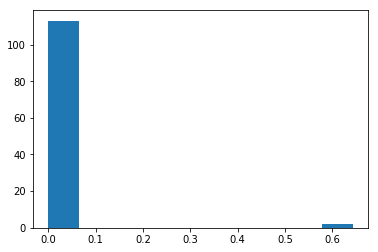

In [109]:
plt.hist(new_groups.scores)

In [106]:
import pandas as pd

groups = pd.DataFrame(itinerary)
groups.rename(index=str, columns={0: "p1", 1: "p2", 2:'p3'})

,p1,p2,p3
0,1437,4850,6577
1,5154,6814,1045
2,1984,2446,5950
3,5510,6854,6643
4,7181,6714,4686
5,2988,6895,7105
6,5158,4977,6278
7,5940,5125,2215
8,6785,6282,3797
9,6808,6571,5964


In [107]:
for i in range(len(itinerary)):
    
    num_shared = shared_projects(itinerary[i])
    if num_shared > 3:
        print(i, num_shared)

In [108]:
groups.to_csv('group_test_with_katie_no_playlab.csv')